## **Random Forest**

In [70]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score

In [71]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [72]:
df.isnull().sum().sort_values(ascending=False)

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [74]:
le = LabelEncoder()
for i in df.select_dtypes(include=['category', 'object']):
    df[i] = le.fit_transform(df[i])

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    int32  
 3   smoker      244 non-null    int32  
 4   day         244 non-null    int32  
 5   time        244 non-null    int32  
 6   size        244 non-null    int64  
dtypes: float64(2), int32(4), int64(1)
memory usage: 9.7 KB


In [76]:
df.sample(5)

,total_bill,tip,sex,smoker,day,time,size
70,12.02,1.97,1,0,1,0,2
13,18.43,3.00,1,0,2,0,4
57,26.41,1.50,0,0,1,0,2
128,11.38,2.00,0,0,3,1,2
217,11.59,1.50,1,1,1,0,2


# **Classifier**

In [77]:
X = df.drop('sex', axis=1)
y = df['sex']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [80]:
X_train

,total_bill,tip,smoker,day,time,size
228,13.28,2.72,0,1,0,2
208,24.27,2.03,1,1,0,2
96,27.28,4.00,1,0,0,2
167,31.71,4.50,0,2,0,4
84,15.98,2.03,0,3,1,2
...,...,...,...,...,...,...
106,20.49,4.06,1,1,0,2
14,14.83,3.02,0,2,0,2
92,5.75,1.00,1,0,0,2
179,34.63,3.55,1,2,0,2


In [81]:
X_train_scaled

array([[-0.79306155, -0.2580329 , -0.79056942, -0.76167571, -0.61093325,
        -0.61214068],
       [ 0.46322744, -0.74211442,  1.26491106, -0.76167571, -0.61093325,
        -0.61214068],
       [ 0.80730659,  0.6399734 ,  1.26491106, -1.8379566 , -0.61093325,
        -0.61214068],
       ...,
       [-1.65383098, -1.46472887,  1.26491106, -1.8379566 , -0.61093325,
        -0.61214068],
       [ 1.64749986,  0.32426806,  1.26491106,  0.31460518, -0.61093325,
        -0.61214068],
       [ 2.75289699, -0.41237773,  1.26491106, -0.76167571, -0.61093325,
         0.45363997]])

In [82]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

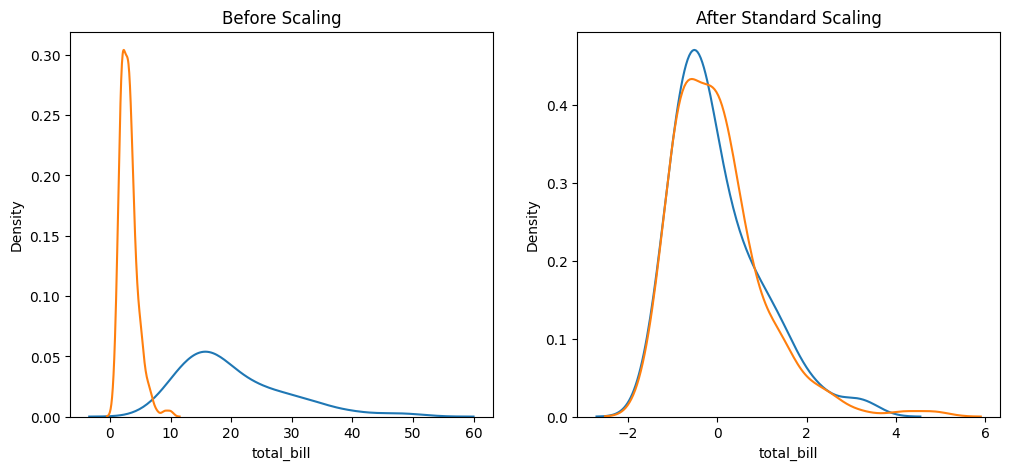

In [83]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['total_bill'], ax=ax1)
sns.kdeplot(X_train['tip'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['total_bill'], ax=ax2)
sns.kdeplot(X_train_scaled['tip'], ax=ax2)
plt.show()

In [84]:
X_train_scaled

,total_bill,tip,smoker,day,time,size
0,-0.793062,-0.258033,-0.790569,-0.761676,-0.610933,-0.612141
1,0.463227,-0.742114,1.264911,-0.761676,-0.610933,-0.612141
2,0.807307,0.639973,1.264911,-1.837957,-0.610933,-0.612141
3,1.313709,0.990757,-0.790569,0.314605,-0.610933,1.519421
4,-0.484419,-0.742114,-0.790569,1.390886,1.636840,-0.612141
...,...,...,...,...,...,...
190,0.031128,0.682067,1.264911,-0.761676,-0.610933,-0.612141
191,-0.615878,-0.047563,-0.790569,0.314605,-0.610933,-0.612141
192,-1.653831,-1.464729,1.264911,-1.837957,-0.610933,-0.612141
193,1.647500,0.324268,1.264911,0.314605,-0.610933,-0.612141


In [85]:
model_cl = RandomForestClassifier()
model_cl.fit(X_train_scaled, y_train)
y_pred = model_cl.predict(X_test_scaled)

In [86]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[ 6 13]
 [ 8 22]]
              precision    recall  f1-score   support

           0       0.43      0.32      0.36        19
           1       0.63      0.73      0.68        30

    accuracy                           0.57        49
   macro avg       0.53      0.52      0.52        49
weighted avg       0.55      0.57      0.56        49



## **Regressor**

In [87]:
X = df.drop('tip', axis=1)
y = df['tip']

In [88]:
le = LabelEncoder()
for i in df.select_dtypes(include=['category', 'object']):
    df[i] = le.fit_transform(df[i])

In [89]:
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
model_reg = RandomForestRegressor()
model_reg.fit(X_train, y_train)
y_pred = model_reg.predict(X_test)
print('MSE :',mean_squared_error(y_test, y_pred))
print('R2_score :',r2_score(y_test, y_pred))
print('RMSE :', np.sqrt(mean_squared_error(y_test,y_pred)))

MSE : 0.9333948961224503
R2_score : 0.2532669651569178
RMSE : 0.9661236443242917
